# Assignment 2 - Differential Equations

Solving partial differential equations is crucial to a huge variety of physical problems encountered in science and engineering. There are many different numerical techniques available, all with their own advantages and disadvantages, and often specific problems are best solved with very specific algorithms.

You will have learnt about Euler and Runge-Kutta methods in 2nd year lectures, and you should have explored the class of problem that can be solved with numerical integration in exercises.  In this assignment, we will cover more complex classes of problem - described below.


## Initial value problems

In this class of problem, the state of a system is fully described by an ordinary differential equation together with an initial condition.  For example, the motion of a body under gravity, with initial conditions given by the position and momentum of the body at a particular point in time.  The soluiton (ie. position and momentum at an arbitrary time in the future) can then be found by integration.  You should have encountered the use of numerical integration in solving such problems in the 2nd year course.

## Boundary value problems

Boundary value problems differ in that the conditions are specified on a set of boundaries, rather than at just one extreme.  For example, the electric field between a pair of capacitor plates at fixed potential, as discussed in the problem below.

There are several numerical approaches for solving boundary value problems, for example :

### Shooting Method

In this method, the boundary value problem is reduced to an initial value problem, which is solved numerically for different parameter choices. A solution is found when a set of parameters give the desired boundary conditions.  For example, finding a rocket trajectory which joins two specified points in space.  The boundary conditions are the specified points, and the initial momentum is a parameter that may be varied until a solution is found.  (This should sound familiar!)

### Finite Difference Methods

In this class of method, the differential equation is evaluated at discrete points in space and time, and derivatives are approximated by finite differences.  The Euler and Runga-Kutta methods are simple examples.  These methods typically involve iteration on the set of finite values until a solution is found.

### Relaxation

This is a common technique used to solve time-independent boundary condition problems.  An initial guess at the solution is supplied, and then allow to "relax" by iterating towards the final solution.  Conceptually this is is the same as the time-dependent problem of letting the system reach equilibrium from some arbitrary initial state.

The steps for implementing a relaxation method are :
1. Define a (normally regular) spatial grid covering the region of interest including points (or “nodes”) on the boundaries
2. Impose the boundary conditions by fixing the nodes on the boundaries to the relevant values
3. Set all non-boundary nodes to an initial guess
4. Write down finite difference equations
5. Pick a convergence criterion
6. Iterate the equations at each node until the solution converges

Care must be taken to choose the form of the equations and iteration method to ensure stability and efficiency.

## Q1 - The Poisson Equation

Consider the example of the Poisson equation $(\nabla^2V = −\rho)$ in one dimension. The grid of nodes in this case can be taken as a series of $n$ equally spaced points $x_i$ with a spacing $\Delta x = h$. The Taylor expansion of $V$ around the point $x_i$ is :

$$ V(x) = V(x_i) + \delta x \frac{dV(x_i)}{dx} + \delta x^2 \frac{d^2V(x_i)}{dx^2} + ...$$

so adding the values at $\delta x = \pm h$ (i.e. at $x_n \pm 1$) gives :

$$ V(x_{i−1}) + V(x_{i+1}) = 2V(x_i) + h^2 \frac{d^2V(x_i)}{dx^2} $$

which can be rearranged to give Equation 1 :

$$ \frac{d^2V(x_i)}{dx^2} = \frac{V(x_{i−1}) + V(x_{i+1}) − 2V(x_i)}{h^2}  $$

This is the standard finite difference representation for the second derivative.

Generalising this equation to 2D in the Poisson equation, and rearranging, gives Equation 2, that can be used to iterate the value at each node:

$$ V(x_i,y_j)= \frac{1}{4} (V(x_{i−1},y_j)+V(x_{i+1},y_j)+V(x_i,y_{j−1})+V(x_i,y_{j+1}))+ \frac{\rho(x_i,y_j)h^2}{4} $$

In the absence of any sources ($\nabla^2 V=0$, i.e. the Laplace equation) each node is simply the average of its four closest neighbours.

This equation can be solved in a number of ways. One option is to calculate a new value for each node based on the previous values for each of the neighbour nodes, requiring two complete copies of the grid. This is called the Jacobi method. A second option is to update the values on the grid continually, so each node is updated using partially old and partially new values. This is the Gauss-Seidel method.

## 1a) 
Write a function to solve Laplace’s equation in two dimensions for the potential V. You should use the finite-difference representation above (with $\rho=0$) and iterate using either the Jacobi or Gauss-Seidel method. You will need to choose and apply a convergence condition e.g. no node value changes by more than X% between successive iterations.

This will take about 20 seconds.


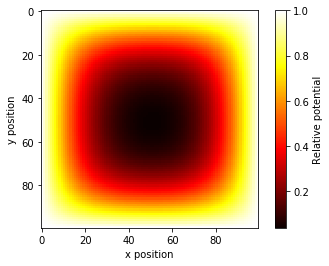

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def Grid(nodes):                                                                
    
    """
    This function defines the set of nodes that act as the initial guesses
    for the potential at each point. Two arrays are first defined, and old one and
    a new one (that gets updated), which consist of only zeros. Then the outside 
    square of each array is replaced with a non-zero number that acts as the 
    boundary conditions of the system. The function then returns the size of the 
    array (nodes) and the old and new arrays.
    """ 
    
    BC = 1                                                                      # Boundary condition.
    new = np.zeros((nodes,nodes))
    new[:,[0,-1]] = new[[0,-1]] = BC                                            # Changes the values of the outside shell in the array (sets the boundary condition).
    
    return nodes,new,BC


def Potential(nodes,new,convergence_limit):
    
    """
    This function calculates the potential at each node. It cycles through all the
    elements in the array (excluding those in the outer shell) and updates each 
    to be the average of its four neighbours. With each update, it checks the 
    percent change between the previous and current iteration. If it is lower than
    a certain bound, the convergence condition is met and it stops iterating, 
    returning the complete array.
    """
    
    old = np.zeros((nodes,nodes))
    Convergence = False
    
    while Convergence == False: 
        for i in range(1,nodes-1):  
            for j in range(1,nodes-1):      
                new[i][j] = (1/4) * (new[i-1][j] + 
                                     new[i][j-1] + new[i+1][j] + new[i][j+1])   # Calculating the new potential at each node.
        
        middle = int(np.floor(nodes/2))
        centre_new = new[middle][middle]
        centre_old = old[middle][middle]
        
        if centre_old != 0:                                                     # Checking for convergence.
            if 1 - convergence_limit < centre_new / centre_old < 1 + convergence_limit:                
                Convergence = True
        old = np.copy(new)                                                      # Making old = new so the convergence condition can be checked next iteration.
            
    return old


print("This will take about 20 seconds.")

nodes = Grid(100)[0]
new = Grid(nodes)[1]
convergence_limit = 10**-2
potential = Potential(nodes,new,convergence_limit)
          
plt.imshow(potential, cmap='hot')
plt.xlabel("x position")
plt.ylabel("y position")
plt.colorbar(label = "Relative potential")
plt.show()


## Discussion

I decided to use the Gauss-Seidel method to solve Laplace's equation in this case, since it is the method that came most naturally to me. However, I did have to keep a copy of the array - one iteration behind - to check the convergence condition. 

The first iteration had to skip checking the convergence condition. This is because the 'old' array consisted entirely of zeros, so taking the ratio of the new to the old values would give a divide by zero error. Hence the convergence check was skipped whenever the corresponding value in the 'old' array was equal to zero.

After each iteration, I checked to see if the ratio of the centre values of the new array to the old array satisfied the convergence condition. This is because the centre value will take the longest to converge. Hence if this value meets the condition, it is guaranteed that every other value in the array will have met the condition.

Calculating the potential takes a significant amount of time for a 100x100 array and a convergence limit of 10^-3. This is because the program has to cycle through each element in the array, carrying out the potential calculation on each element. Vectorization gets around this problem by applying an operation to the entire array - allowing for the calculation of much larger arrays in much shorter times. However I was not able to implement this in my code.

Verify your function by checking it works in a simple, known case. Compare the solution found with the analytical solution and quantify the differences. Use this to investigate the sensitivity of your solution to the choice of grid density and convergence condition.

This will take about 20 seconds.


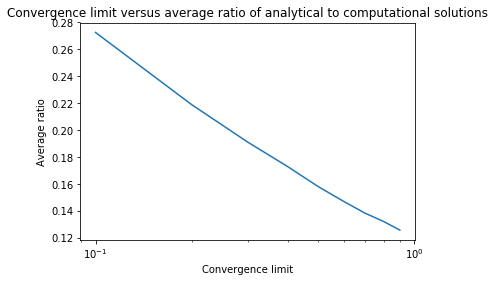

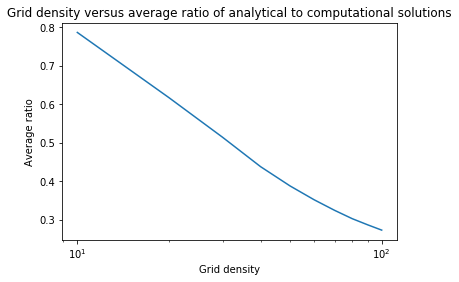

In [4]:
def convergence_func(nodes,BC):
    
    """
    This function measures the average ratio of the analytical to the 
    computational solutions for each iteration, with varying convergence
    limit. The analytical solution is the solution as if the computer has an
    infinitesimally small convergence limit, i.e. an array where each element 
    equals the boundary condition. 
    """
    
    analyticalConv = np.full((nodes,nodes),BC)                                  # Defining the analytical solution array.
    diff = []                                                                   # List that will contain the difference between the analytical and computational solutions.
    convergence_list = []                                                       # List that will contain the varying convergence limits.
    convergence_limit = 0.9
    
    while convergence_limit >= 10**-1:
        
        diff_sum = 0
        new = Grid(nodes)[1]
        computationalConv = Potential(nodes,new,convergence_limit)
        
        for i in range(1,nodes-1):
            for j in range(1,nodes-1):
                diff_sum += computationalConv[i][j] / analyticalConv[i][j]      # Difference between each element.
        
        diff.append(diff_sum/(nodes-2)**2)                                      # Taking the average difference over the entire array.
        convergence_list.append(convergence_limit)
        convergence_limit -= 0.1
        
    return convergence_list,diff


def size_func(BC):
    
    """
    This function is very similar to the previous; it compares the average 
    ratio of the analytical solution to the computational solution with a 
    varying grid density. The analytical solution is, as before, an array 
    filled with values equal to the boundary condition.
    """
    
    grid_density = 10 
    diff_grid = []                                                              # List that will contain the difference between thw analytical and computational solutions.
    grid_density_list = []                                                      # List that will contain the varying grid density.
    convergence_limit = 10**-1
    
    while grid_density <= 100:
        
        diff_sum_grid = 0
        new = Grid(grid_density)[1]
        computationalGrid = Potential(grid_density,new,convergence_limit)       # Calculating the computational solution.
        analyticalGrid = np.full((grid_density,grid_density),BC)                # Defining the analytical solution.
        
        for i in range(1,grid_density-1):
            for j in range(1,grid_density-1):
                diff_sum_grid += computationalGrid[i][j] / analyticalGrid[i][j] # Difference between each element.
                
        diff_grid.append(diff_sum_grid/(grid_density-2)**2)                     # Taking the average difference over the entire array.
        grid_density_list.append(grid_density)
        grid_density += 10
        
    return grid_density_list,diff_grid


print("This will take about 20 seconds.")   

nodes = Grid(100)[0]
BC = Grid(nodes)[2]
convergence_list = convergence_func(nodes,BC)[0]
conv_diff = convergence_func(nodes,BC)[1]    
grid_density_list = size_func(BC)[0]
grid_diff = size_func(BC)[1]

plt.plot(convergence_list,conv_diff)
plt.xlabel("Convergence limit")
plt.ylabel("Average ratio")
plt.title("Convergence limit versus average ratio of analytical to computational solutions")
plt.xscale("log")
plt.show()

plt.plot(grid_density_list,grid_diff)
plt.xlabel("Grid density")
plt.ylabel("Average ratio")
plt.title("Grid density versus average ratio of analytical to computational solutions")
plt.xscale("log")
plt.show()


## Discussion

Concerning the first graph, the relation shown is as expected; for a high convergence limit, the program doesn't iterate for as long, so the similarity between the computational and analytical solutions will be low. A low convergence limit iterates for longer, so the array approaches the analytical solution.

For the second graph, for a small grid density, the average node value will be closer to the boundary condition for a certain number of iterations than for a large grid density. This is because a greater proportion of the nodes are close to the boundary, so approach the boundary condition faster than those in the centre. For a large grid density, there are more nodes close to the centre that take longer to approach the boundary condition, so the average value is lower.

## 1b)
Now use your function to calculate the potential and electric field within and around a parallel plate capacitor comprising a pair of plates of length a, separation d. Demonstrate that the field configuration approaches the “infinite” plate solution (E = V/d between plates, E = 0 elsewhere) as the ratio of  becomes large.

This will take about 5 seconds.


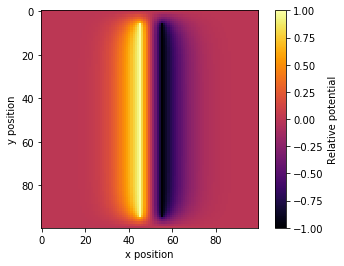

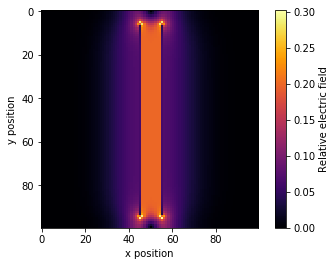

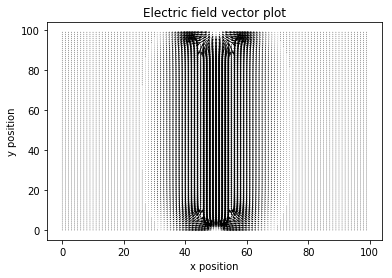

In [5]:
def CapGrid(nodes):                                                                
   
    """
    This function defines the initial guess for the parallel plate capacitor 
    potential. It is an array that consists of zeros everywhere, apart from two 
    parallel lines near the centre. The left of these consists of ones, and the
    right of minus ones, to represent the positive and negative charged plates
    respectively.
    """

    newCap = np.zeros((nodes,nodes))
    separation = 10
    length = 90
    leftPlate = np.floor((nodes/2 - separation/2)*nodes/100)                    # Defining the positions and heights of the capacitor plates.
    rightPlate = np.floor((nodes/2 + separation/2)*nodes/100)
    topPlate = np.floor((nodes/2 - length/2)*nodes/100)
    bottomPlate = np.floor((nodes/2 + length/2)*nodes/100)
    BC = 1
    
    for i in range(nodes):
        for j in range(nodes):
            if topPlate < i < bottomPlate and j == leftPlate:
                newCap[i][j] = BC                                               # Positively charged plate.
            if topPlate < i < bottomPlate and j == rightPlate:
                newCap[i][j] = -BC                                              # Negatively charged plate.
                
    return nodes,newCap,separation,BC


def CapPot(nodes,newCap,convergence_limit,BC):

    """
    This function calculates the potential at each node in the capacitor array.
    It defines the 'old' array as one full of zeros, and makes this equal to the
    updated 'new' array after each iteration. It does the same check for
    convergence as previously, only now the ratio between the old and new values
    can be less than one (due to the negative potential introduced in this part).
    Hence a range either side of 1 is used. 
    """

    old = np.zeros((nodes,nodes))
    Convergence = False
    
    while Convergence == False: 
        
        convergence_count = 0                                                   # Keeps track of the number of nodes that satisfy the convergence condition.
        node_count = 0                                                          # Keeps track of the number of nodes.
        
        for i in range(1,nodes-1):
            for j in range(1,nodes-1):
                
                if not (newCap[i][j] == BC or newCap[i][j] == -BC):             # This if statement keeps the boundary conditions constant.
                    newCap[i][j] = (1/4) * (newCap[i-1][j] + newCap[i][j-1] + 
                          newCap[i+1][j] + newCap[i][j+1])
                    
                    node_count += 1
                    
                    if old[i][j] != 0:                                          # Check to prevent divide by zero error.
                        ratio =  abs(newCap[i][j] / old[i][j])
                        if 1 - convergence_limit < ratio < 1 + convergence_limit:          
                            convergence_count += 1
                            
        if convergence_count == node_count:                                     # If the number of converged nodes = the number of nodes, then every node has converged.
            Convergence = True
                            
        old = np.copy(newCap)                                                    
            
    return old


def CapElec(nodes,old):

    """
    This function calculates the absolute value of the electric field for the 
    parallel plate capacitor defined above. The gradient function returns two 
    arrays - one for each dimension - the gradient in the x and in the y. Hence
    the absolute value of the electric field can be calculated by taking the 
    absolute values of each element in these arrays.
    """ 

    elec = np.zeros((nodes,nodes))
    elec0 = np.gradient(old)[0]                                                 # np.gradient function returns 2 arrays.
    elec1 = np.gradient(old)[1]
    
    for i in range(nodes):
        for j in range(nodes):
            elec[i][j] = np.sqrt(elec0[i][j]**2 + elec1[i][j]**2)               # Calculating the absolute value from each array.
            
    return elec,elec0,elec1


print("This will take about 5 seconds.")

nodes = CapGrid(100)[0]
newCap = CapGrid(nodes)[1]
separation = CapGrid(nodes)[2]
BC = CapGrid(nodes)[3]
convergence_limit = 10**-1
old = CapPot(nodes,newCap,convergence_limit,BC)
elec = CapElec(nodes,old)[0]
elec0 = CapElec(nodes,old)[1]
elec1 = CapElec(nodes,old)[2]

plt.imshow(old, cmap='inferno')
plt.xlabel("x position")
plt.ylabel("y position")
plt.colorbar(label = "Relative potential")
plt.show()

plt.imshow(elec, cmap='inferno')
plt.xlabel("x position")
plt.ylabel("y position")
plt.colorbar(label = "Relative electric field")
plt.show()

plt.quiver(elec0,elec1)
plt.xlabel("x position")
plt.ylabel("y position")
plt.title("Electric field vector plot")
plt.show()


## Discussion

For a large E/d, it is clear that the electric field between the capacitor plates approaches a constant value, and the area around the plates approaches zero. In fact, if the length of the plates equals the size of the array used to hold the values of the electric field - simulating infinitely long plates - there is very little 'leakage' of the electric field outside the plates, confirming the infinite plate solution.

In this part, it is unclear which node would satisfy the convergence condition last, since this depends on the postions and dimensions of the capacitor plates. Hence I changed the method by which I check the convergence condition from the previous part. The new method works by keeping track of the number of converged nodes. If at the end of the iteration this value is equal to the total number of variable nodes, then every node has converged.

# Q2 - The Diffusion Equation

Solving the diffusion equation 

$$\alpha \nabla^2 \phi = \frac{\partial \phi}{\partial t}$$

is mathematically similar to solving the Poisson equation. The technique will be to start from known initial conditions and use finite difference equations to propagate the node values forwards in time (subject to any boundary conditions).

A first try using Equation 1 above gives the finite difference form:

$$\frac{\phi′(x_i) − \phi(x_i)}{\delta t} = \frac{\alpha}{h^2} [\phi (x_{i−1}) + \phi(x_{i+1}) − 2\phi(x_i)]$$

Here the values, $\phi$, at three neighbouring points at a time t are used to evaluate the value $\phi`$ at the next time step, $t + \delta t$. This is known as a forward-time or explicit method. Unfortunately, this methood is known to be unstable for certain choices of $h$ and $\delta t$.

A stable alternative is obtained by using the equivalent backward-time or implicit equation:

$$\frac{\phi'(x_i) - \phi(x_i)}{\delta t} = \frac{\alpha}{h^2} [\phi'(x_{i-1}) + \phi'(x_{i+1}) -  2\phi'(x_i)] $$

Now the spatial derivative on the right-hand side needs to be evaluated at $t + \delta t$, which may appear problematic as the $\phi(x)$ values are known while the updated $\phi′(x)$ values are not. Fortunately Equation 3 can be written explicitly in matrix form and solved using the methods explored in Assignment 1.


## 2a)
An iron poker of length 50 cm is initially at a temperature of 20 C. At time t = 0, one end is thrust into a furnace at 1000 C and the other end is held in an ice bath at 0 C. Ignoring heat losses along the length of the poker, calculate the temperature distribution along it as a function of time. You may take the thermal conductivity of iron to be a constant 59 W/m/K, its specific heat as 450 J/kg/K and its density as 7,900 kg/m3.

Your solution should apply the implicit finite difference method above. It is also recommended that you use an appropriate linear algebra routine from numpy/scipy. You should find ways to verify your results, and quantify the uncertainties due to the method. Discuss your results in the text box below.

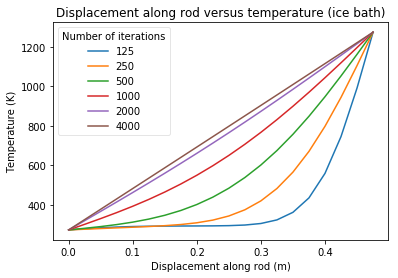

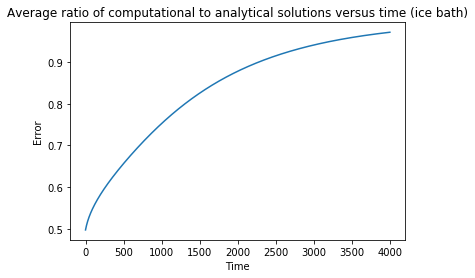

In [6]:
def rod(nodes):
    
    """
    This function initialises the iron poker, and sets the boundary 
    conditions (1000 C at one end, 0 C at the other). It then defines some
    constants, including h and alpha, and creates the displacment list that
    stores the values of distance along the length of the poker.
    """
    
    rodlist = [293] * nodes                                                     # Initialising the poker.
    rodlist[0] = 273
    rodlist[-1] = 1273
    
    delta_t = 1                                                                 # Defining constants.
    h = 0.5 / nodes
    alpha = 59 / (450 * 7900)
    p = alpha * delta_t / h**2
    
    distance = 0
    displacement = []
    
    for i in range(nodes):                                                      # Creating the displacement list.
        displacement.append(distance)
        distance += h
    
    return nodes,rodlist,p,displacement,delta_t


def matrix(nodes,p):
    
    """
    This function defines the matrix that controls the diffusion of heat 
    through the poker. Only the nodes either side of the current node are 
    affected by the heat transfer, hence the matrix consisting entirely of
    zeros, apart from along the diagonal and elements above and below the 
    diagonal.
    """
    
    heatMatrix = np.zeros((nodes,nodes))
    
    for i in range(nodes):
        for j in range(nodes):
            
            if i == j:                                                          # Defining values on the diagonal.
                heatMatrix[i][j] = 1 + 2*p
            elif j + 1 == i or j - 1 == i:                                      # Defining values above and below the diagonal.
                heatMatrix[i][j] = -p
                
    heatMatrix[0][0] = heatMatrix[-1][-1] = 1                                   # Making the boundary conditions constant.
    heatMatrix[0][1] = heatMatrix[-1][-2] = 0
                
    return heatMatrix


def heatSolve(nodes,heatMatrix,rodlist,delta_t,t_lim):
    
    """
    This function actually solves the diffusion equation. At each time step,
    the temperature at each node along the poker is solved. This repeats until
    the time limit is reached, returning the temperature distribution at that
    time. The whole process repeats for different values of the time limit
    to show convergence.
    """
    
    temp = []
    
    for j in range(len(t_lim)):
        t = 0
        while t <= t_lim[j]:      
            for i in range(nodes):
                rodlist = np.linalg.solve(heatMatrix,rodlist)                   # Using scipy to solve the equation.
                t += delta_t
        temp.append(rodlist)

    return temp


def error(nodes,t_lim,delta_t):
    
    """
    This function compares the computational solution with the analytical
    solution, where the analytical solution has linearly increasing 
    temperature along the length of the poker from 273K to 1273K. The average
    ratio of these values is taken for each time, and then plotted versus 
    time to show how the accuracy of the computational solution converges.
    """
    
    x = np.linspace(0,0.5,nodes)
    analytical = 2000*x + 273                                                   # Defining the analytical solution.
    ratio_list = []
    t = 0
    t_list = []
    rodlist = rod(nodes)[1]                                                     # Re-initialising the poker temperatures.
    
    while t <= t_lim[-1]:
        
        ratio_count = 0
        rodlist = np.linalg.solve(heatMatrix,rodlist)                           # Solving the poker temperature for each time.
        
        for i in range(nodes):
            
            if rodlist[i] <= analytical[i]:
                ratio_count += rodlist[i]/analytical[i]                         # Calculating the ratio of the computational to analytical solutions.
            else:
                ratio_count += analytical[i]/rodlist[i]
            
        ratio_list.append(ratio_count/(nodes))                                  # Finding the average ratio across the entire poker.
        t_list.append(t)
        t += delta_t
        
    return ratio_list,t_list


nodes = rod(20)[0]
rodlist = rod(nodes)[1]
p = rod(nodes)[2]
displacement = rod(nodes)[3]
delta_t = rod(nodes)[4]
heatMatrix = matrix(nodes,p)
t_lim = [125,250,500,1000,2000,4000]
temp = heatSolve(nodes,heatMatrix,rodlist,delta_t,t_lim)

ratio_list = error(nodes,t_lim,delta_t)[0]
t_list = error(nodes,t_lim,delta_t)[1] 


for i in range(len(t_lim)):
    plt.plot(displacement,temp[i])
plt.xlabel("Displacement along rod (m)")
plt.ylabel("Temperature (K)")
plt.legend(t_lim,title="Number of iterations",framealpha = 0.5)
plt.title("Displacement along rod versus temperature (ice bath)")
plt.show()

plt.plot(t_list,ratio_list)
plt.xlabel("Time")
plt.ylabel("Error")
plt.title("Average ratio of computational to analytical solutions versus time (ice bath)")
plt.show()


## Discussion

The matrix for finding the heat transfer can be calculated as follows:

The backward-time equation for solving the diffusion equation is given by:

$$\frac{\phi'(x_i) - \phi(x_i)}{\delta t} = \frac{\alpha}{h^2} [\phi'(x_{i-1}) + \phi'(x_{i+1}) -  2\phi'(x_i)] .$$

Solving for $\phi(x_i)$:

$$ \phi(x_i) = \phi'(x_i) - \frac{\alpha\delta t}{h^2}\left(\phi'(x_{i-1}) + \phi'(x_{i+1}) - 2\phi'(x_i)\right).$$

Taking $p = \frac{\alpha\delta t}{h^2}$ and rearranging gives:

$$ \phi(x_i) = (2p+1)\phi'(x_i) - p\phi'(x_{i-1}) - p\phi'(x_{i+1}). $$

This corresponds to the diagonal elements of the matrix being $2p+1$, and those elements above and below the diagonals $-p$. In addition to these, the first and last elements (top left and bottom right) should be 1, and the elements to the right and left respectively should equal zero, since these correspond to the end nodes on the poker - the boundary conditions - which should not change. 

This gives a matrix that looks like:

\begin{equation*}
M = 
\begin{pmatrix}
1 & 0 & 0 & \cdots & 0 & 0\\
-p & 1+2p & -p & \cdots & 0 & 0 \\
0 & -p & 1+2p & \cdots & 0 & 0 \\
\vdots  & \vdots  & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & 0 & \cdots & 1+2p & -p \\
0 & 0 & 0 & \cdots & 0 & 1 
\end{pmatrix}
\end{equation*}

As expected, as the time the process is iterated over becomes large, the computational solution becomes the analytical solution - where the temperature linearly increases along the length of the poker from 273K to 1273K. This is confirmed in the average error graph - the average ratio between the computational and analytical solutions approaches 1 as the number of iterations increases.

## 2b)
Now repeat the calculation, but assume the far end of the poker from the furnace is no longer held at 0 C, and experiences no heat loss. You will need to modify your code to achieve this, and you should discuss the motivation for your changes below.

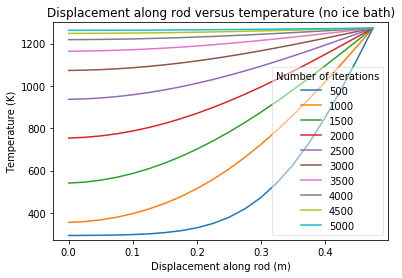

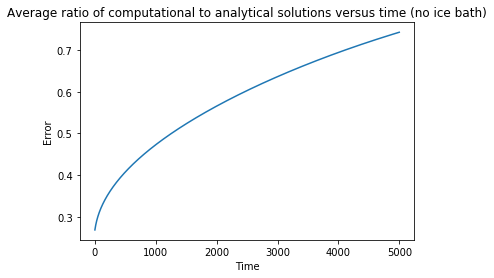

In [7]:
def matrixNoCold(nodes,p):
    
    """
    This function has the same purpose as the function 'matrix' previously, 
    but now it takes into account the fact that there is no boundary condition
    on one end (the cold end) of the poker. 
    """
    
    heatMatrix = np.zeros((nodes,nodes))
    
    for i in range(nodes):
        for j in range(nodes):
            
            if i == j:                                                          # Defining values on the diagonal.
                heatMatrix[i][j] = 1 + 2*p
            elif j + 1 == i or j - 1 == i:                                      # Defining values above and below the diagonal.
                heatMatrix[i][j] = -p
                
    heatMatrix[-1][-1] = 1                                                      # Making the boundary conditions constant.
    heatMatrix[0][0] = 1 + p
    heatMatrix[0][1] = -p
    heatMatrix[-1][-2] = 0
                
    return heatMatrix


def errorNoCold(nodes,t_lim,delta_t):
    
    """
    This function has the same purpose as the function 'error' previously, but
    now it calculates the error in the case of no ice bath keeping one end of 
    the poker at 273K.
    """
    
    analytical = [1273] * nodes                                                 # Defining the analytical solution.
    ratio_list = []
    t = 0
    t_list = []
    rodlist = rod(nodes)[1]                                                     # Re-initialising the poker temperatures.
    
    while t <= t_lim[-1]:
        
        ratio_count = 0
        rodlist = np.linalg.solve(heatMatrix,rodlist)                           # Solving the poker temperature for each time.
        
        for i in range(nodes):
            
            if rodlist[i] <= analytical[i]:
                ratio_count += rodlist[i]/analytical[i]                         # Calculating the ratio of the computational to analytical solutions.
            else:
                ratio_count += analytical[i]/rodlist[i]
            
        ratio_list.append(ratio_count/(nodes))                                  # Finding the average ratio across the entire poker.
        t_list.append(t)
        t += delta_t
        
    return ratio_list,t_list


nodes = rod(20)[0]
rodlist = rod(nodes)[1]
rodlist[0] = 293                                                                # Setting the initial poker temperature to 293K rather than 273K.
p = rod(nodes)[2]
displacement = rod(nodes)[3]
delta_t = rod(nodes)[4]
heatMatrix = matrixNoCold(nodes,p)
t_lim = [500,1000,1500,2000,2500,3000,3500,4000,4500,5000]
temp = heatSolve(nodes,heatMatrix,rodlist,delta_t,t_lim)
ratio_list = errorNoCold(nodes,t_lim,delta_t)[0]
t_list = errorNoCold(nodes,t_lim,delta_t)[1] 


for i in range(len(t_lim)):
    plt.plot(displacement,temp[i])
plt.ylim(273,1300)
plt.xlabel("Displacement along rod (m)")
plt.ylabel("Temperature (K)")
plt.legend(t_lim,title="Number of iterations",framealpha = 0.5)
plt.title("Displacement along rod versus temperature (no ice bath)")
plt.show()

plt.plot(t_list,ratio_list)
plt.xlabel("Time")
plt.ylabel("Error")
plt.title("Average ratio of computational to analytical solutions versus time (no ice bath)")
plt.show()

## Discussion

The general backward time equation is given by:

$$ \phi(x_i) = (2p+1)\phi'(x_i) - p\phi'(x_{i-1}) - p\phi'(x_{i+1}). $$

In the case of the first node on the poker, i.e. $i = 0$:

$$ \phi(x_0) = (2p+1)\phi'(x_0) - p\phi'(x_{-1}) - p\phi'(x_{1}). $$

However this end node doesn't experience any heat loss, i.e. there is no heat flow from $\phi'(x_0)$ to $\phi(x_{-1})$. This means $\phi'(x_0) = \phi'(x_{-1})$. Hence:

$$ \phi(x_0) = (2p+1)\phi'(x_0) - p\phi'(x_{0}) - p\phi'(x_{1}), $$
and
$$ \phi(x_0) = -p\phi'(x_1) + (1+p)\phi'(x_0). $$

Therefore the first two elements of the matrix become $1+p$ and $-p$, respectively.

\begin{equation*}
M = 
\begin{pmatrix}
1+p & -p & 0 & \cdots & 0 & 0\\
-p & 1+2p & -p & \cdots & 0 & 0 \\
0 & -p & 1+2p & \cdots & 0 & 0 \\
\vdots  & \vdots  & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & 0 & \cdots & 1+2p & -p \\
0 & 0 & 0 & \cdots & 0 & 1 
\end{pmatrix}
\end{equation*}

Similarly to the ice bath case, the average ratio of analytical to computational solutions approaches 1 as the time limit gets large. This is also seen in the temperature-displacement curve.

## Extensions

There are many possible extensions to this assignment, for example :
* Model the field in more complex arrangements than the parallel plate capacitor in 1b).
* Model a point charge using the code from Q1? What are the problems/challenges in doing so ?
* Demonstrate that the explicit method in Q2 is unstable for some choices of $\delta t$ and $h$.
* Implement higher-order methods (eg. Crank-Nicolson which includes a 2nd order difference for the spaital derivative).

You are advised to discuss any extensions with your demonstrator or the unit director.  If you wish to include any extensions, please do so *below* this cell.

This will take about 3 minutes (sorry!).


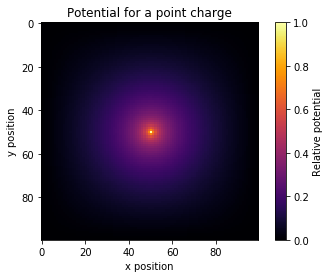

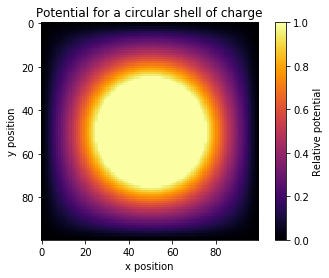

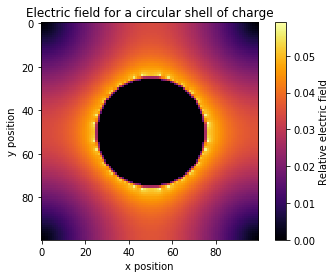

In [9]:
def pointCharge(nodes):
    
    """
    This function creates an array and makes the centre node the boundary 
    condition, simulating a point charge.
    """
    
    grid = np.zeros((nodes,nodes))
    BC = 1
    mid = int(nodes/2)
    
    grid[mid][mid] = BC                                                         # Defining the centre node.
    
    return nodes,grid,BC


def circularShell(nodes):
    
    """
    This function creates an array and fills a centre circular shell with
    values equal to the boundary condition, simulating a circular shell
    of charge.
    """
    
    grid_shell = np.zeros((nodes,nodes))
    BC = 1
    radius = nodes/4
    
    for i in range(nodes):
        for j in range(nodes):
            circle = (i-nodes/2)**2 + (j-nodes/2)**2                            # Equation of a circle.
            if circle - 25 < radius**2 < circle + 25:                           # Condition for changing the value of a node.
                grid_shell[i][j] = BC
            
    return nodes,grid_shell,BC


print("This will take about 3 minutes (sorry!).")

nodes = pointCharge(100)[0]
grid_point_charge = pointCharge(nodes)[1]
BC = pointCharge(nodes)[2]
convergence_limit = 10**-5
point_charge = CapPot(nodes,grid_point_charge,convergence_limit,BC)

grid_shell = circularShell(nodes)[1]
circular_shell = CapPot(nodes,grid_shell,convergence_limit,BC)

e_shell = CapElec(nodes,circular_shell)[0]                                      # Calculating the electric field for the case of a circular shell of charge.


plt.imshow(point_charge, cmap='inferno')
plt.xlabel("x position")
plt.ylabel("y position")
plt.title("Potential for a point charge")
plt.colorbar(label = "Relative potential")
plt.show()

plt.imshow(grid_shell, cmap='inferno')
plt.xlabel("x position")
plt.ylabel("y position")
plt.title("Potential for a circular shell of charge")
plt.colorbar(label = "Relative potential")
plt.show()

plt.imshow(e_shell, cmap='inferno')
plt.xlabel("x position")
plt.ylabel("y position")
plt.title("Electric field for a circular shell of charge")
plt.colorbar(label = "Relative electric field")
plt.show()

## Discussion

The problem with modelling a point charge is that point charges are discrete - only an array of infinite size could accurately simulate one.

As for the circular shell, the models acccurately simulate how the potential behaves in this case - constant potential within the shell, and decreasing potential outside. Additionally, the electric field is accurate, with zero electric field inside the shell.